# FINANCIAL ASSET ANALYSIS - (Pick 3-4 stocks)



-  A practical application of the CRISP-DM Model








#### Aim - Conduct stock analysis to determine whether to buy, hold, or sell the stock.

## Part 1: Business and Data Understanding

Business Objectives and Project Background : 
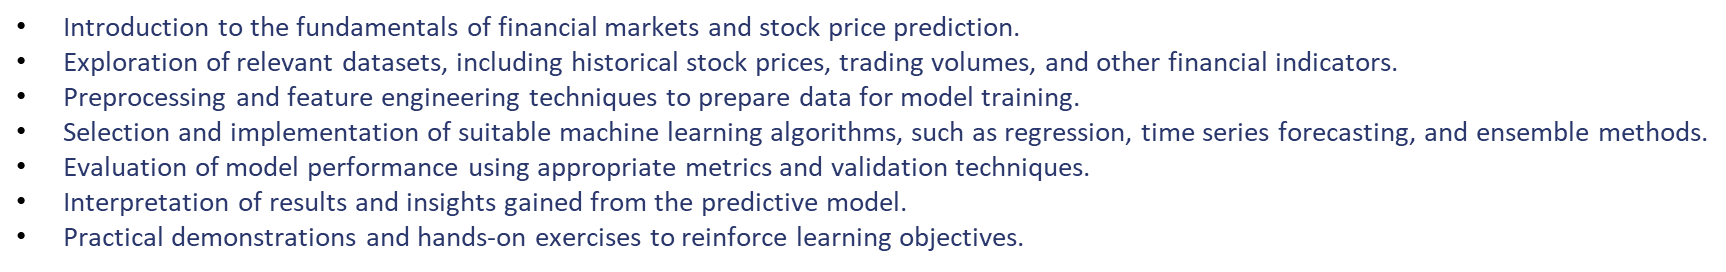

## Libraries

This part is a constantly involving step, meaning that we install and import necessary librabies as the code require. This part comes together at the end


In [1]:
# Data Processing
%pip install pandas_ta
%pip install yfinance
%pip install holidays

# Data Visualization
%pip install matplotlib
%pip install plotly

# Machine Learning and Preprocessing
%pip install imblearn
%pip install xgboost
%pip install Boruta
%pip install minisom

# Backtesting and Strategy
%pip install backtesting

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data Processing
import numpy as np #Provides support for large, multi-dimensional arrays and matrices,along with a collection of mathematical functions to operate on these arrays.
import pandas as pd #  Offers data structures and operations for manipulating numerical tables and time series.

import pandas_ta as ta # Extends pandas with technical analysis indicators and utilities.
import yfinance as yf # Enables easy access to historical market data from Yahoo Finance.
from datetime import date # Supplies classes for manipulating dates and times.
import warnings #Controls the display of warning messages. 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Visualization
import matplotlib.pyplot as plt # Creates static, animated, and interactive visualizations in Python.
from plotly.subplots import make_subplots # Enables the creation of subplots in Plotly.
import plotly.graph_objects as go # Offers a wide range of graph objects for creating interactive plots
import plotly.express as px # Simplifies the creation of common visualizations in Plotly.
import seaborn as sns # Provides a high-level interface for drawing attractive and informative statistical graphics.Machine Learning and Preprocessing

# Machine Learning and Preprocessing
from sklearn.pipeline import Pipeline # Facilitates the creation of machine learning pipelines.
from sklearn.preprocessing import StandardScaler, label_binarize, MinMaxScaler # Offers various preprocessing utilities for scaling and transforming data.¶
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, KFold # Provides tools for splitting data into training and testing sets, and for performing cross-validation.¶
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report, precision_score, recall_score, f1_score, make_scorer, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
#  Contains functions to evaluate the performance of machine learning models.¶
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier #  Implements ensemble learning algorithms.
from sklearn.svm import SVC # Provides support vector machine algorithms.
from sklearn.naive_bayes import GaussianNB # Implements Gaussian Naive Bayes classification.
from sklearn.neighbors import KNeighborsClassifier # Offers K-Nearest Neighbors classification.
from sklearn.tree import DecisionTreeClassifier # Implements decision tree classification.
from sklearn.utils import compute_class_weight # Computes class weights for unbalanced datasets.
from sklearn.datasets import make_classification # Generates synthetic datasets for classification.
from sklearn.decomposition import PCA # Performs Principal Component Analysis for dimensionality reduction.
from sklearn.feature_selection import VarianceThreshold # for removing the variance according to threshold
from sklearn.impute import KNNImputer # impute missing values using KNN
from sklearn.multiclass import OneVsRestClassifier #Handles multi-class classification problems.
import xgboost as xgb # Provides gradient boosting algorithms from the XGBoost library.
from xgboost import XGBClassifier # Implements XGBoost classifier.
from boruta import BorutaPy # Facilitates feature selection using the Boruta algorithm.
from minisom import MiniSom # Implements Self-Organizing Maps (SOM) for clustering.
from itertools import cycle #  Provides an iterator to cycle through a sequence.
from imblearn.over_sampling import SMOTE, RandomOverSampler # Handles imbalanced datasets by oversampling.
from imblearn.pipeline import Pipeline
from scipy.spatial import distance # Contains spatial algorithms and distance computations.
from collections import Counter # Implements a counter for counting hashable objects.

# Backtesting and Strategy
from backtesting import Backtest, Strategy # Provides tools for backtesting trading strategies.
import holidays # Determines public holidays for various countries.


## Part 2: Dataset Generation and Exploratory Data Analysis


Step 1: Extracting Raw Stock Price from Yahoo Finance


1.   Visualizing stock price to see the trend over the years

Note: So far we do not have our dataset for modeling. We extracted stock price information to generate a dataset for modeling

Step 2: Dataset Generation

*  Caculating financial indicators from our raw dataset to create features in our classification models.
*  Applying Open Price to generate target variable
We use 1% as the threshold to define whether to buy, hold, or sell the stock. Difference in threshold results in different distributions of the target variable, which affects model quality
*  By combining target variable and features, we have our dataset

Step 3: EDA

*   Summarize the main characteristics of the dataset (describe)
*   Frequency distribution of target variable
*   Visualizing variance of generated features, rough dimensionality reduction






### Importing Stock Prices from Yahoo Finance

In [3]:
#reading yahoo finance data and establishing the dates
df= yf.download('XWD.TO', # Indicator  'CL=F',#'XWD.TO' #'^GSPC'
start='2019-05-01',
end='2024-05-01').reset_index()# resetting the DataFrame's index to a numerical range (0, 1, 2, ...)

[*********************100%%**********************]  1 of 1 completed


In [4]:
#Printing the dataFrame
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,53.587173,53.647297,53.256512,53.256512,49.307674,37824
1,2019-05-02,53.296593,53.416836,53.036072,53.236473,49.289124,19461
2,2019-05-03,53.406815,53.607216,53.316631,53.597195,49.623104,10479
3,2019-05-06,52.905811,53.356712,52.905811,53.356712,49.400448,11277
4,2019-05-07,52.975952,53.016033,52.324650,52.555111,48.658279,174251
...,...,...,...,...,...,...,...
1250,2024-04-24,83.110001,83.110001,82.620003,82.820000,82.285400,10200
1251,2024-04-25,81.970001,82.290001,81.709999,82.199997,81.669403,5500
1252,2024-04-26,82.980003,83.169998,82.900002,83.000000,82.464241,8200
1253,2024-04-29,83.330002,83.339996,82.949997,83.209999,82.672882,14300


### WTI general Chart - Oberserving Stock Price trend over the years

In [6]:
#printing the graph for opening prices
def plot_WTI(y='Open'):
    df.sort_values(by='Date',inplace=True)
    fig = px.line(df, x="Date", y="Open",template ='seaborn')
    fig.update_layout(yaxis=dict(tickprefix="$"))
    fig.show()
plot_WTI()

## Feature generation

After calculating each financial indicator, we should compare the values with Yahoo finance to double check if the indicators have been calculated correctly. We just need pick values from a few dates.

# 1. RSI 
Use to measure the speed and change of price movements. RSI values range from 0 to 100 and are calculated using the average gains and losses over a specified period (usually 14 days). Here we need to sort the dataset and ensures that the data is in chronological order, Which is crucial for calculating time-series indicators like RSI.


### RSI calculation

In [7]:
#Calculating the indicator Rsi
def rsi():
    #sorts the DataFrame
    df.sort_values(by='Date',inplace=True)
    #calculating the RSI indicator using the ta (Technical Analysis)
    df.ta.rsi(close='Open', append=True, signal_indicators=True)

    #printing the graph for the closing price and Rsi indicator

    # Create subplots
    #make_subplots with 2 rows and 1 column.
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_titles=['Open', 'RSI'], vertical_spacing=0.05)

    # Information for adding the traces to the subplots
    traces = [
        (df.Date, df['Open'], '#0c36b3', 1,'Open'),
        (df.Date, df['RSI_14'], '#ff9900', 2,'RSI_14')
    ]
    #iterates to add the traces to the plot.
    for x_data, y_data, color, row,name in traces:
        fig.add_trace(go.Scatter(
            x=x_data,
            y=y_data,
            name=name,
            line=dict(color=color, width=2),
            showlegend=False,
        ), row=row, col=1)
      #various aspects of the plot's layout
    fig.for_each_annotation(lambda a: a.update(y=-0.1) if a.text in [] else a.update(x=-0.05))
    fig.update_layout(width=1400, height=800, yaxis=dict(tickprefix="$"),
                      hovermode="x unified", legend_traceorder="normal", template="seaborn",xaxis2_title="Year")
    fig.update_traces(xaxis='x2')
    fig.show()




### RSI Chart

In [100]:
#printing the graph for the opening price and Rsi indicator
rsi()

# 2. MACD 
Moving Average Convergence Divergence. It is a popular technical analysis tool used to understand the momentum and direction of a stock’s price. It helps figure out when a stock might start moving up or down. MACD focuses on trend direction and strength by comparing moving averages and shows how strong the current trend is.

### MACD calculation

In [8]:
# Calculating the indicator Macd
def macd():
    # Sorts the DataFrame
    df.sort_values(by='Date', inplace=True)
    # Calculating the indicator Macd
    df.ta.macd(close='Open', fast=12, slow=26, append=True)
    # Printing the graph for the opening price and Macd indicator

    # Create subplots
    # make_subplots with 2 rows and 1 column.
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_titles=['Open', 'Macd'], vertical_spacing=0.05)

    # Information for adding the traces to the subplots
    traces = [
        (df.Date, df['Open'], '#0c36b3', 1, 'Open', 'line'),
        (df.Date, df['MACD_12_26_9'], '#ff9900', 2, 'MACD', 'line'),
        (df.Date, df['MACDh_12_26_9'], '#BF00BF', 2, 'MACD HISTOGRAM', 'bar'),
        (df.Date, df['MACDs_12_26_9'], '#A9A9A9', 2, 'MACD SIGNAL', 'line')
    ]

    # Iterates to add the traces to the plot.
    for x_data, y_data, color, row, name, trace_type in traces:
        if trace_type == 'line':
            fig.add_trace(go.Scatter(
                x=x_data,
                y=y_data,
                name=name,
                line=dict(color=color, width=2),
                showlegend=False,
            ), row=row, col=1)
        elif trace_type == 'bar':
            fig.add_trace(go.Bar(
                x=x_data,
                y=y_data,
                name=name,
                marker_color=color,
                showlegend=False,
            ), row=row, col=1)

    # Various aspects of the plot's layout
    fig.for_each_annotation(lambda a: a.update(y=-0.1) if a.text in [] else a.update(x=-0.05))
    fig.update_layout(width=1400, height=800, yaxis=dict(tickprefix="$"),
                      hovermode="x unified", legend_traceorder="normal", template="seaborn", xaxis2_title="Year")
    fig.update_traces(xaxis='x2')
    fig.show()

### MACD Chart

In [9]:
#printing the graph for the opening price and Macd indicator
macd()

# 3.MA
The average of a stock’s price over a specific number of periods (e.g., 50 days). Useful when identify the overall trend of a stock. Long-term trend analysis, smoothing out price data, and identifying support and resistance levels.

### Moving Average Calculation

In [10]:
#parameter Avg lengh
avg_lenght=50
#Calculating the indicator Ma
def Ma():

    df.sort_values(by='Date',inplace=True)
    df.ta.sma(close='Open',length=avg_lenght, append=True)
    #printing the graph for the opening price and Ma indicator

    # Create subplots
    #make_subplots with 2 rows and 1 column.
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_titles=['Open','Ma'], vertical_spacing=0.05)

    # Information for adding the traces to the subplots
    traces = [
        (df.Date, df['Open'], '#0c36b3', 1,'Open'),
        (df.Date, df['SMA_50'], '#ff9900', 2,'Ma'),
    ]
    #iterates to add the traces to the plot.
    for x_data, y_data, color, row,name in traces:
        fig.add_trace(go.Scatter(
            x=x_data,
            y=y_data,
            name=name,
            line=dict(color=color, width=2),
            showlegend=False,
        ), row=row, col=1)
      #various aspects of the plot's layout
    fig.for_each_annotation(lambda a: a.update(y=-0.1) if a.text in [] else a.update(x=-0.05))
    fig.update_layout(width=1400, height=800, yaxis=dict(tickprefix="$"),
                      hovermode="x unified", legend_traceorder="normal", template="seaborn",xaxis2_title="Year")
    fig.update_traces(xaxis='x2')
    fig.show()


### Moving Average Chart

In [11]:
#printing the graph for the opening price and Ma indicator
Ma()

# 4. The Stochastic Oscillator
The Stochastic Oscillator is a tool used to understand if a stock is overbought or oversold by comparing its current closing price to its price range over a certain period. It compares how close the current price is to its highest and lowest prices over a specific number of days.
%K Line: Shows where the current closing price falls within the price range of the last few days.
%D Line: A smoothed version of the %K line, helping to identify trends and potential turning points.

### Stochastic oscillator Calculation

In [12]:
#Calculating the indicator Stoch
def stoch():
    df.sort_values(by='Date',inplace=True)
    df.ta.stoch(close='Open', high= df['High'], low= df['Low'],k=14, d=3, append=True)
    #printing the graph for the opening price and Stoch indicator
  # Create subplots
    #make_subplots with 2 rows and 1 column.
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_titles=['Open','stoch'], vertical_spacing=0.05)

    # Information for adding the traces to the subplots
    traces = [
        (df.Date, df['Open'], '#0c36b3', 1,'Open'),
        (df.Date, df['STOCHk_14_3_3'], '#ff9900', 2,'STOCHk'),
        (df.Date, df['STOCHd_14_3_3'], '#A9A9A9', 2,'STOCHd')
    ]
    #iterates to add the traces to the plot.
    for x_data, y_data, color, row,name in traces:
        fig.add_trace(go.Scatter(
            x=x_data,
            y=y_data,
            name=name,
            line=dict(color=color, width=2),
            showlegend=False,
        ), row=row, col=1)
      #various aspects of the plot's layout
    fig.for_each_annotation(lambda a: a.update(y=-0.1) if a.text in [] else a.update(x=-0.05))
    fig.update_layout(width=1400, height=800, yaxis=dict(tickprefix="$"),
                      hovermode="x unified", legend_traceorder="normal", template="seaborn",xaxis2_title="Year")
    fig.update_traces(xaxis='x2')
    fig.show()


### Stochastic oscillator Chart

In [13]:
#printing the graph for the opening price and Stoch indicator
stoch()

# Exponential moving average 
Used to see how a stock's price is trending over time, but it gives more weight to recent prices than older ones. This means it reacts faster to new price changes compared to a simple average. Short-Term Trading: Ideal for checking quick changes in price and making decisions based on recent trends. Day Trading: Useful for traders who need to make quick decisions throughout the day.

### Exponential moving average (EMA) calculation

In [14]:
#Calculating the indicator Ema
from pickle import FALSE
def ema():

    df.sort_values(by='Date',inplace=True)
    df.ta.ema(close='Open', length=9, offset=None, append=True, talib=False)
    #printing the graph for the opening price and Ema indicator
  # Create subplots
    #make_subplots with 2 rows and 1 column.
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_titles=['Open','ema'], vertical_spacing=0.05)

    # Information for adding the traces to the subplots
    traces = [
        (df.Date, df['Open'], '#0c36b3', 1,'Open'),
        (df.Date, df['EMA_9'], '#ff9900', 2,'EMA')

    ]
    #iterates to add the traces to the plot.
    for x_data, y_data, color, row,name in traces:
        fig.add_trace(go.Scatter(
            x=x_data,
            y=y_data,
            name=name,
            line=dict(color=color, width=2),
            showlegend=False,
        ), row=row, col=1)
      #various aspects of the plot's layout
    fig.for_each_annotation(lambda a: a.update(y=-0.1) if a.text in [] else a.update(x=-0.05))
    fig.update_layout(width=1400, height=800, yaxis=dict(tickprefix="$"),
                      hovermode="x unified", legend_traceorder="normal", template="seaborn",xaxis2_title="Year")
    fig.update_traces(xaxis='x2')
    fig.show()


### Ema chart

In [15]:
#printing the graph for the opening price and Ema indicator
ema()

# Bollinger bands
Technical analysis tool used in finance to understand market volatility and identify potential buying or selling opportunities.Bollinger Bands consist of three lines plotted on a price chart:
the middle band, which is typically a 20-day simple moving average (SMA); the upper band, which is the middle band plus two standard deviations of the price; and the lower band, which is the middle band minus two standard deviations. 

### Bollinger bands calculation

In [16]:
#Calculating the indicator Bollinger bands
def bbands():

    df.sort_values(by='Date',inplace=True)
    df.ta.bbands(close='Open', length=20, std=2, append=True)
    #printing the graph for the opening price and Bollinger bands indicator
 # Create subplots
    #make_subplots with 2 rows and 1 column.
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_titles=['Open','bbands'], vertical_spacing=0.05)

    # Information for adding the traces to the subplots
    traces = [
        (df.Date, df['Open'], '#0c36b3', 1,'Open'),
        (df.Date, df['BBL_20_2.0'], '#ff9900', 2,'bbandsL'),
        (df.Date, df['BBM_20_2.0'], '#483D8B', 2,'bbandsM'),
        (df.Date, df['BBU_20_2.0'], '#A9A9A9', 2,'bbandsU')
    ]
    #iterates to add the traces to the plot.
    for x_data, y_data, color, row,name in traces:
        fig.add_trace(go.Scatter(
            x=x_data,
            y=y_data,
            name=name,
            line=dict(color=color, width=2),
            showlegend=False,
        ), row=row, col=1)
      #various aspects of the plot's layout
    fig.for_each_annotation(lambda a: a.update(y=-0.1) if a.text in [] else a.update(x=-0.05))
    fig.update_layout(width=1400, height=800, yaxis=dict(tickprefix="$"),
                      hovermode="x unified", legend_traceorder="normal", template="seaborn",xaxis2_title="Year")
    fig.update_traces(xaxis='x2')
    fig.show()

### Bollinger bands chart

In [17]:
#printing the graph for the opening price and Bollinger bands indicator
bbands()

# Ichimoku cloud
##### comprehensive technical analysis indicator that defines support and resistance, identifies trend direction, gauges momentum, and provides trading signals. It is composed of five different components that work together to provide a more complete picture of market conditions.
#####  five components: Tenkan-sen (short-term momentum, 9-period average), Kijun-sen (medium-term momentum, 26-period average), Senkou Span A (average of Tenkan-sen and Kijun-sen, plotted 26 periods ahead), Senkou Span B (52-period average, plotted 26 periods ahead), and Chikou Span (current closing price, plotted 26 periods back). The Senkou Spans form the Kumo (Cloud), indicating future support and resistance levels.

### Ichimoku cloud calculation

In [18]:
#Calculating the indicator Ichimoku cloud
def Ichimoku():

    df.sort_values(by='Date',inplace=True)
    df.ta.ichimoku(close='Open', high= df['High'], low= df['Low'], tenkan=9, kijun=26, senkou=52, append=True)
    #printing the graph for the opening price and ichimoku bands indicator
     # Create subplots
    #make_subplots with 2 rows and 1 column.
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_titles=['Open','Ichimoku'], vertical_spacing=0.05)

    # Information for adding the traces to the subplots
    traces = [
        (df.Date, df['Open'], '#0c36b3', 1,'Open'),
        (df.Date, df['ISA_9'], '#ff9900', 2,'SenkanA'),
        (df.Date, df['ISB_26'], '#BF00BF', 2,'SenkanB'),
        (df.Date, df['ITS_9'], '#0000FF', 2,'Tenkan'),
        (df.Date, df['IKS_26'], '#00BFBF', 2,'Kijun'),
        (df.Date, df['ICS_26'], '#808080', 2,'Chiko')
    ]
    #iterates to add the traces to the plot.
    for x_data, y_data, color, row,name in traces:
        fig.add_trace(go.Scatter(
            x=x_data,
            y=y_data,
            name=name,
            line=dict(color=color, width=2),
            showlegend=False,
        ), row=row, col=1)
      #various aspects of the plot's layout
    fig.for_each_annotation(lambda a: a.update(y=-0.1) if a.text in [] else a.update(x=-0.05))
    fig.update_layout(width=1400, height=800, yaxis=dict(tickprefix="$"),
                      hovermode="x unified", legend_traceorder="normal", template="seaborn",xaxis2_title="Year")
    fig.update_traces(xaxis='x2')
    fig.show()

### Ichimoku cloud chart

In [19]:
Ichimoku()

# Standard deviation
Critical measure of volatility and risk. Amount of variation or dispersion in a set of financial data points, such as asset returns.

### Standard deviation calculation

In [20]:
#Calculating the indicator standard deviation
def stdev():

    df.sort_values(by='Date',inplace=True)
    df.ta.stdev(close='Open', length=30, append=True)
    #printing the graph for the opening price and standart deviation indicator
   # Create subplots
    #make_subplots with 2 rows and 1 column.
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_titles=['Open','standar deviation'], vertical_spacing=0.05)

    # Information for adding the traces to the subplots
    traces = [
        (df.Date, df['Open'], '#0c36b3', 1,'Open'),
        (df.Date, df['STDEV_30'], '#ff9900', 2,'Standar_dev')
    ]
    #iterates to add the traces to the plot.
    for x_data, y_data, color, row,name in traces:
        fig.add_trace(go.Scatter(
            x=x_data,
            y=y_data,
            name=name,
            line=dict(color=color, width=2),
            showlegend=False,
        ), row=row, col=1)
      #various aspects of the plot's layout
    fig.for_each_annotation(lambda a: a.update(y=-0.1) if a.text in [] else a.update(x=-0.05))
    fig.update_layout(width=1400, height=800, yaxis=dict(tickprefix="$"),
                      hovermode="x unified", legend_traceorder="normal", template="seaborn",xaxis2_title="Year")
    fig.update_traces(xaxis='x2')
    fig.show()

### Standard deviation chart

In [21]:
stdev()

## Target variable generation

### Daily change calculation
The daily percentage change in price helps capture the immediate fluctuations and movements in the price of an asset.


In [22]:
# Calculation of the daily change of the prices
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df['Daily_Change'] = df['Open'].pct_change() * 100


### target funtion creation

###### By defining thresholds for daily changes, you can categorize days into actionable signals:
###### Buy: When the daily change is significantly negative (e.g., a drop of more than 1%), it indicate a buying opportunity if the price is considered undervalued.
###### Sell: When the daily change is significantly positive (e.g., a rise of more than 1%), it indicate a selling opportunity if the price is considered overvalued.
###### Hold: When the daily change is within a neutral range, indicating no significant price movement, a "hold" decision is often appropriate.

Why threshold 1 and -1?
by trial and error, it has been observed that with 1 and -1 thresould the imbalanceness of target variable is less as compare to 3, -3.

In [23]:
# Define thresholds for selling and buying
sell_threshold = 1.0  # Threshold for selling
buy_threshold = -1.0  # Threshold for buying

# Create the numeric target variable based on the thresholds
df['Target'] = df['Daily_Change'].apply(lambda change: 1 if change > sell_threshold else (2 if change < buy_threshold else 0))


## Combining Features and Target to create the dataset

In [25]:
# List of columns to copy
columns_to_copy = [ 'Date','Open','RSI_14',
       'RSI_14_A_80', 'RSI_14_B_20', 'MACD_12_26_9', 'MACDh_12_26_9',
       'MACDs_12_26_9', 'SMA_50', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'EMA_9',
       'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0',
       'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26', 'STDEV_30','Target']


# Copying multiple columns at once using the list of column names
df1 = df[columns_to_copy].copy()

# Display the new DataFrame
print(df1)

KeyError: "['RSI_14', 'RSI_14_A_80', 'RSI_14_B_20'] not in index"

## EDA

let's examine and visualise the dataset we created.
to see, the characteristics, uncover patterns and main goal is to understand the data before applying any data processing techniques and building models.

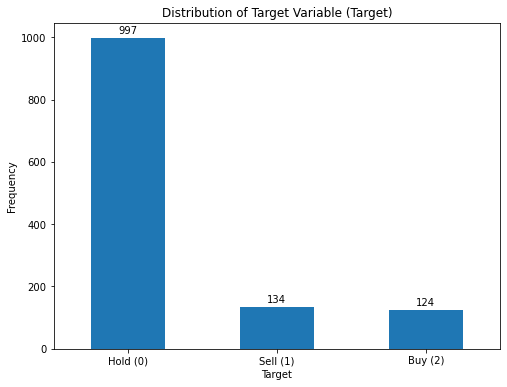

In [165]:
import matplotlib.pyplot as plt

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
ax = df1['Target'].value_counts().plot(kind='bar')

# Adding titles and labels
plt.title('Distribution of Target Variable (Target)')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=['Hold (0)', 'Sell (1)', 'Buy (2)'], rotation=0)

# Adding numbers on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


Distribution of target variable indicates imbalance dataset

In [167]:
# Calculating the percentage for each Class
Target_counts = df1['Target'].value_counts(normalize=True) * 100

# Display the percentages
Target_percentages = Target_counts.to_frame(name='Percentage')
Target_percentages

,Percentage
Target,
0,79.442231
1,10.677291
2,9.880478


summarize and understand the data

In [121]:
#statistical analysis
df1.describe()

,Date,Open,RSI_14,RSI_14_A_80,RSI_14_B_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_50,STOCHk_14_3_3,...,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,STDEV_30,Target
count,1255,1255.000000,1241.000000,1255.0,1255.000000,1230.000000,1222.000000,1222.000000,1206.000000,1240.000000,...,1236.000000,1236.000000,1236.000000,1204.000000,1178.000000,1247.000000,1230.000000,1229.000000,1226.000000,1255.000000
mean,2021-10-29 18:44:27.729083648,64.173207,54.900861,0.0,0.000797,0.174780,0.000861,0.176826,64.028999,63.250735,...,65.918604,5.768935,0.598810,63.640548,63.306816,64.055003,63.887585,64.431801,1.136810,0.304382
min,2019-05-01 00:00:00,42.975952,18.274018,0.0,0.000000,-3.290031,-0.923016,-2.854022,49.086573,3.843049,...,49.598099,1.598433,-0.420732,46.811121,47.464928,44.834667,46.412825,42.975952,0.267335,0.000000
25%,2020-07-29 12:00:00,56.713428,47.673290,0.0,0.000000,-0.079759,-0.115161,-0.048070,56.706012,38.320827,...,58.525905,3.621202,0.344184,56.600702,56.698397,56.595692,56.718437,57.034069,0.739635,0.000000
50%,2021-10-29 00:00:00,65.000000,56.128054,0.0,0.000000,0.313507,0.012275,0.301999,64.681764,72.625959,...,66.833205,4.837815,0.680875,64.503241,63.822645,64.684999,64.524048,65.190002,0.960814,0.000000
75%,2023-01-30 12:00:00,70.265259,63.251823,0.0,0.000000,0.575016,0.108522,0.538630,70.290895,88.359322,...,71.994466,6.406835,0.858828,69.912500,69.859722,70.180197,70.105209,70.370003,1.382544,0.000000
max,2024-04-30 00:00:00,84.760002,78.553026,0.0,1.000000,1.182961,0.847781,1.089254,83.019200,99.817898,...,85.505441,34.954715,1.285264,82.952501,80.475002,84.225002,83.510002,84.760002,5.537190,2.000000
std,NaN,8.520634,11.777316,0.0,0.028228,0.621106,0.201501,0.580254,7.894180,27.867709,...,8.253779,4.021225,0.323734,7.901887,7.669676,8.448917,8.273834,8.419952,0.662789,0.640055


Variance is a fundamental statistical concept that helps in understanding the spread and variability of data,assessing risk, evaluating model performance, and ensuring data quality.
Its importance spans various fields, including finance, machine learning, education, and general data analysis.

In [28]:
# Calculating variance for each numeric column

# Selecting only numeric columns from the DataFrame
numeric_df = df1.select_dtypes(include=['number'])
variance = numeric_df.var()
print(variance)

Open              72.601207
RSI_14           138.705173
RSI_14_A_80        0.000000
RSI_14_B_20        0.000797
MACD_12_26_9       0.385773
MACDh_12_26_9      0.040602
MACDs_12_26_9      0.336695
SMA_50            62.318086
STOCHk_14_3_3    776.609184
STOCHd_14_3_3    729.413679
EMA_9             70.786454
BBL_20_2.0        71.825343
BBM_20_2.0        68.859499
BBU_20_2.0        68.124861
BBB_20_2.0        16.170254
BBP_20_2.0         0.104804
ISA_9             62.439811
ISB_26            58.823926
ITS_9             71.384190
IKS_26            68.456323
ICS_26            70.895594
STDEV_30           0.439289
Target             0.409670
dtype: float64


## Part 3: Data Preparation & Preprocessing

### Train - Test Split


In [ ]:
# Stratified random sampling is not possible because this data is having time series 
# past data values can inference future predictions 
# breaking the temporal order can distrupt these dependancies and leading to innacurate modeing and forecasting
# Time series data often exhibit trends and seasonal patterns. 
# Stratified splitting can mix different parts of these patterns, 
# making it harder for models to learn the underlying structure of the data.

In [122]:
# Sort the DataFrame by the 'Date' column
df1 = df1.sort_values('Date')

# Determine the index to split at 70% of the dates
split_idx = int(len(df1) * 0.7)

# Split the data based on this index
train = df1.iloc[:split_idx]
test = df1.iloc[split_idx:]

# Now extract X and y for both training and testing sets
X_train = train.drop(columns=['Target', 'Date','Open'])
y_train = train['Target']
X_test = test.drop(columns=['Target', 'Date','Open'])
y_test = test['Target']

# Print shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (878, 21)
Shape of y_train: (878,)
Shape of X_test: (377, 21)
Shape of y_test: (377,)


In [123]:
# Calculate the frequency distribution for test set
frequency_distribution = y_test.value_counts(normalize=True) * 100

# Display the frequency distribution
print(frequency_distribution)

Target
0    85.676393
1     7.957560
2     6.366048
Name: proportion, dtype: float64


In [124]:
# Calculate the frequency distribution for the training set
frequency_distribution = y_train.value_counts(normalize=True) * 100

# Display the frequency distribution
print(frequency_distribution)

Target
0    76.765376
1    11.845103
2    11.389522
Name: proportion, dtype: float64


### Data Cleaning


*   Rough Dimensionality Reduction - variance, missing values
*   Outlier Identification and Treatment
*   Missing Value
*   Imputation






Dimensionality Reduction with Varinace

In [168]:
# remove features by setting the treshold of 0.1 and remove 

In [125]:
threshold = 0.1

# Initialize and fit the selector
selector = VarianceThreshold(threshold=threshold)

# Fit the model on the training data
selector.fit(X_train)

# Transform both training and test data
X_train_reduced = selector.transform(X_train)
X_test_reduced = selector.transform(X_test)

#Convert arrays back to DataFrame
X_train_reduced_df = pd.DataFrame(X_train_reduced, columns=[X_train.columns[i] for i in range(len(X_train.columns)) if selector.get_support()[i]])
X_test_reduced_df = pd.DataFrame(X_test_reduced, columns=[X_train.columns[i] for i in range(len(X_train.columns)) if selector.get_support()[i]])

# print the shape of the original and reduced data
print("Original shape: ", X_train.shape)
print("Reduced shape: ", X_train_reduced_df.shape)
print("Original shape: ", X_test.shape)
print("Reduced shape: ", X_test_reduced_df.shape)

Original shape:  (878, 21)
Reduced shape:  (878, 18)
Original shape:  (377, 21)
Reduced shape:  (377, 18)


Missing Value


In [126]:
# checking if the data have null values in order to do an imputation

X_train_reduced_df.isna().sum()

RSI_14           14
MACD_12_26_9     25
MACDs_12_26_9    33
SMA_50           49
STOCHk_14_3_3    15
STOCHd_14_3_3    17
EMA_9             8
BBL_20_2.0       19
BBM_20_2.0       19
BBU_20_2.0       19
BBB_20_2.0       19
BBP_20_2.0       19
ISA_9            51
ISB_26           77
ITS_9             8
IKS_26           25
ICS_26            0
STDEV_30         29
dtype: int64

In [ ]:
# define the threshold for % of missing values and remove the features above the threshold 
# why? -many missing values does not contribute to model building process as they are noice in the data

In [127]:
# Calculate the percentage of null values in each column for the training data
null_percentage = X_train_reduced_df.isnull().mean() * 100

# Define the threshold
threshold_percentage = 90

# Find columns where the percentage of null values is greater than the threshold
columns_to_drop = null_percentage[null_percentage > threshold_percentage].index

# Drop these columns from both the training and test datasets
X_train_cleaned = X_train_reduced_df.drop(columns=columns_to_drop)
X_test_cleaned = X_test_reduced_df.drop(columns=columns_to_drop)

# print the shape of the original and cleaned data
print("Original shape: ", X_train_reduced_df.shape)
print("Cleaned shape: ", X_train_cleaned.shape)
print("Original shape: ", X_test_reduced_df.shape)
print("Cleaned shape: ", X_test_cleaned.shape)


Original shape:  (878, 18)
Cleaned shape:  (878, 18)
Original shape:  (377, 18)
Cleaned shape:  (377, 18)


Outlier Identification and Treatment

In [ ]:
# why? - out of boundary values can drastically impact on skewness of the data
# leading to misleading results on evaluation phase
# also, many machine learning alforithms and data processing algorithms are sensitive to outliers like PCA and KNN 

In [128]:
def cap_outliers(dataframe):
    for column in dataframe.columns:
       # Calculate the mean and standard deviation for each column
        mean = dataframe[column].mean()
        std = dataframe[column].std()

        # Calculate upper and lower limits
        lower_limit = mean - 3 * std
        upper_limit = mean + 3 * std

        # Apply upper and lower limits
        dataframe[column] = dataframe[column].clip(lower=lower_limit, upper=upper_limit)

# Apply the function to the DataFrame
cap_outliers(X_train_cleaned)


Imputation

In [ ]:
# why?
# to ensure dataset is complete and usable for machine learning and model building
# missing data can lead to biased results

In [129]:
# Create the KNN imputer instance
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the training data
imputer.fit(X_train_cleaned)

# Transform both training and test data
X_train_imputed = imputer.transform(X_train_cleaned)
X_test_imputed = imputer.transform(X_test_cleaned)




### Feature Reduction

In [ ]:
#### can also be done by feature selection(BORUTA) -- give same results

In [ ]:
# feature reduction is dimentionality reduction
# process of reducing the number of input features in a dataset while retaining as much relevant information as possible.
# PCA is a powerful technique for reducing feature dimensions by transforming the original features into principal components that capture the maximum variance. 
# This helps in mitigating issues related to high dimensionality and improving the overall effectiveness of data analysis and machine learning models.

#### PCA

In [130]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply PCA
# Here, we're specifying to keep 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# examine the results
print("Original number of features:", X_train_imputed.shape[1])
print("Reduced number of features:", X_train_pca.shape[1])



Original number of features: 18
Reduced number of features: 4


### Data Balancing

In [ ]:
# as we are dealing with higly imbalanced dataset and while model bulding it is hard for th modle to learn minority class samples,
# bslancing is required
# By addressing class imbalances, balancing techniques can improve model performance, provide accurate evaluation metrics, and lead to more robust and generalizable models.

In [131]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Checking the balance of the classes
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 674, 1: 104, 2: 100})
After SMOTE: Counter({0: 674, 2: 674, 1: 674})


## Part 4 Building and Evaluating Models

#### xgboost

In [ ]:
# XGBoost (Extreme Gradient Boosting) is a highly popular and powerful machine learning algorithm for classification and regression tasks.


In [132]:
# Initialize the XGBoost classifier
model_xgb = xgb.XGBClassifier(
    objective='multi:softprob',  # 'multi:softprob' for multi-class
    n_estimators=100,            # Number of trees to train
    learning_rate=0.1,           # Learning rate
    max_depth=3,                 # Depth of each tree
    seed=42                      # For reproducibility
)

# Train the model
model_xgb.fit(X_train_smote, y_train_smote)

# Predicting the test set results
y_pred = model_xgb.predict(X_test_pca)

In [ ]:
# precision - The proportion of true positive predictions among all positive predictions made by the model. It is a measure of the accuracy of the positive predictions.
# recall - The proportion of true positive predictions among all actual positive instances in the data. It indicates how well the model identifies all relevant instances.
# F1-Score: The harmonic mean of precision and recall. 
# It provides a balance between precision and recall. Higher values indicate a better balance between the two.

In [133]:
# Calculate metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# For a detailed report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))



Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.90      0.65      0.75       323
     Class 1       0.11      0.10      0.11        30
     Class 2       0.14      0.71      0.24        24

    accuracy                           0.61       377
   macro avg       0.39      0.49      0.37       377
weighted avg       0.79      0.61      0.67       377



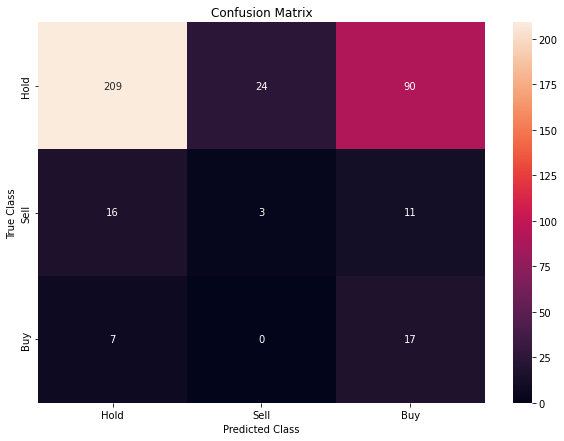

In [134]:
#The main diagonal shows the correct classifications for each class (True Positives)
#Other numbers that are positioned beyond the main diagonal indicate incorrect classifications.
#(0) hold
#(1) sell
#(2) buy
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# New class names
new_class_names = ['Hold', 'Sell', 'Buy']

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=new_class_names, yticklabels=new_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better readability
conf_mat_df = pd.DataFrame(conf_mat, index=new_class_names, columns=new_class_names)

# Print the confusion matrix DataFrame
print("Confusion Matrix:\n", conf_mat_df)


Confusion Matrix:
       Hold  Sell  Buy
Hold   209    24   90
Sell    16     3   11
Buy      7     0   17


In [ ]:
# Convert the multiclass target variable y_test into a binary format, suitable for ROC curve calculations.
# The Receiver Operating Characteristic (ROC) curve is a graphical tool used to evaluate the performance of a classification model, 
# particularly in binary classification problems.

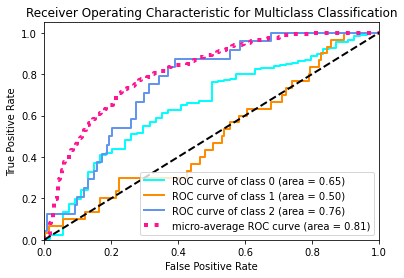

In [135]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Define the XGBClassifier model
model_xgb = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    seed=42,
    num_class=n_classes
)

# Initialize the OneVsRestClassifier
classifier = OneVsRestClassifier(model_xgb)

y_score = classifier.fit(X_train_smote, y_train_smote).predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label="ROC curve of class {0} (area = {1:0.2f})"
                   "".format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color="deeppink", linestyle=":", linewidth=4,
         label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

#### random forest

In [136]:
# Initialize the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred = rf.predict(X_test_pca)

In [137]:
# Calculate metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# For a detailed report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))


Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.74      0.80       323
     Class 1       0.06      0.10      0.08        30
     Class 2       0.15      0.33      0.21        24

    accuracy                           0.66       377
   macro avg       0.36      0.39      0.36       377
weighted avg       0.76      0.66      0.70       377



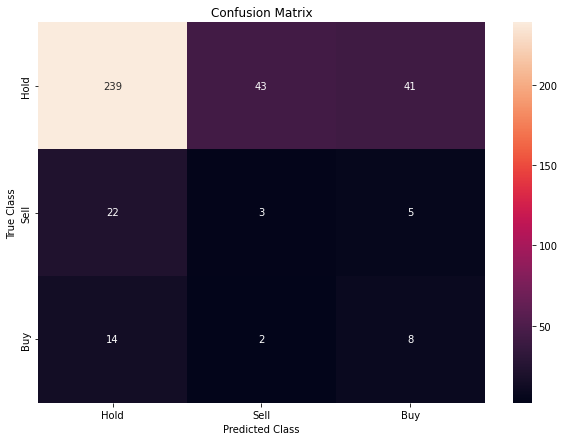

In [45]:
#The main diagonal shows the correct classifications for each class (True Positives)
#Other numbers that are positioned beyond the main diagonal indicate incorrect classifications.
#(0) hold
#(1) sell
#(2) buy
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# New class names
new_class_names = ['Hold', 'Sell', 'Buy']

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=new_class_names, yticklabels=new_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

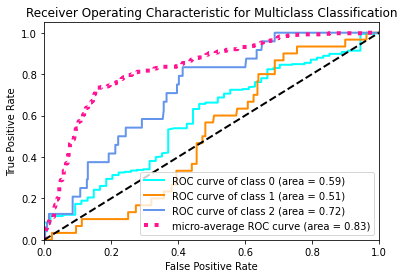

In [138]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Initialize the OneVsRestClassifier
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
y_score = classifier.fit(X_train_smote, y_train_smote).predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label="ROC curve of class {0} (area = {1:0.2f})"
                   "".format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color="deeppink", linestyle=":", linewidth=4,
         label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

#### k-Nearest Neighbors (KNN)

In [139]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred = knn.predict(X_test_pca)


In [140]:
# Calculate metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# For a detailed report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))


Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.84      0.55      0.67       323
     Class 1       0.07      0.23      0.11        30
     Class 2       0.10      0.25      0.14        24

    accuracy                           0.51       377
   macro avg       0.34      0.35      0.30       377
weighted avg       0.73      0.51      0.59       377



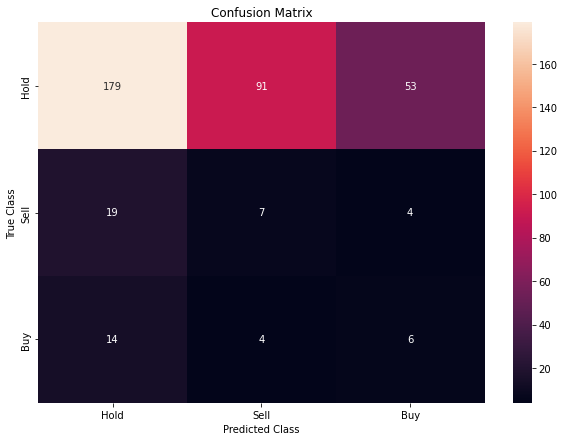

In [141]:
#The main diagonal shows the correct classifications for each class (True Positives)
#Other numbers that are positioned beyond the main diagonal indicate incorrect classifications.
#(0) hold
#(1) sell
#(2) buy
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# New class names
new_class_names = ['Hold', 'Sell', 'Buy']

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=new_class_names, yticklabels=new_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

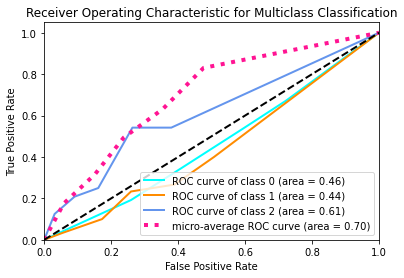

In [142]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Initialize the OneVsRestClassifier
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
y_score = classifier.fit(X_train_smote, y_train_smote).predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label="ROC curve of class {0} (area = {1:0.2f})"
                   "".format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color="deeppink", linestyle=":", linewidth=4,
         label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

#### decision tree

In [143]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training data
dt.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred = dt.predict(X_test_pca)


In [144]:
# Calculate metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# For a detailed report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))


Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.54      0.68       323
     Class 1       0.08      0.03      0.05        30
     Class 2       0.11      0.79      0.19        24

    accuracy                           0.51       377
   macro avg       0.37      0.45      0.30       377
weighted avg       0.80      0.51      0.59       377



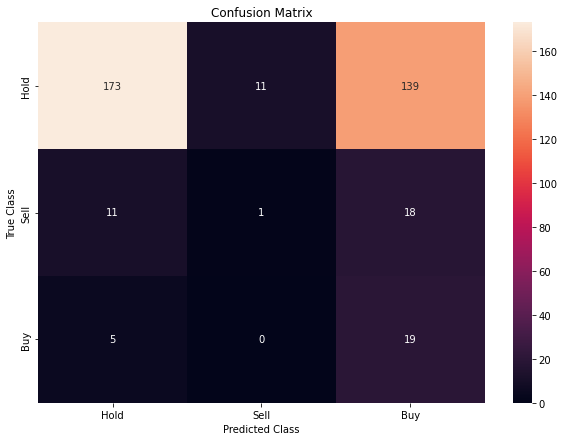

In [145]:
#The main diagonal shows the correct classifications for each class (True Positives)
#Other numbers that are positioned beyond the main diagonal indicate incorrect classifications.
#(0) hold
#(1) sell
#(2) buy
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# New class names
new_class_names = ['Hold', 'Sell', 'Buy']

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=new_class_names, yticklabels=new_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

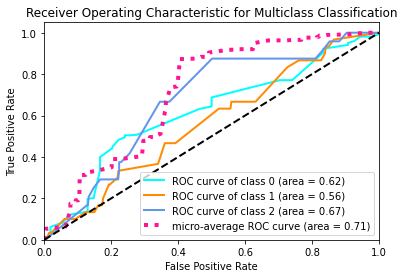

In [146]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Initialize the OneVsRestClassifier
classifier = OneVsRestClassifier(DecisionTreeClassifier(max_depth=3))
y_score = classifier.fit(X_train_smote, y_train_smote).predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label="ROC curve of class {0} (area = {1:0.2f})"
                   "".format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color="deeppink", linestyle=":", linewidth=4,
         label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

#### adaboost

In [172]:
# Initialize AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)


# Train the AdaBoost model
adaboost.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = adaboost.predict(X_test_pca)


In [173]:
# Print the classification report to evaluate the model's performance

# Calculate metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)


# For a detailed report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))


Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.58      0.71       323
     Class 1       0.18      0.17      0.17        30
     Class 2       0.11      0.62      0.18        24

    accuracy                           0.55       377
   macro avg       0.40      0.46      0.35       377
weighted avg       0.80      0.55      0.63       377



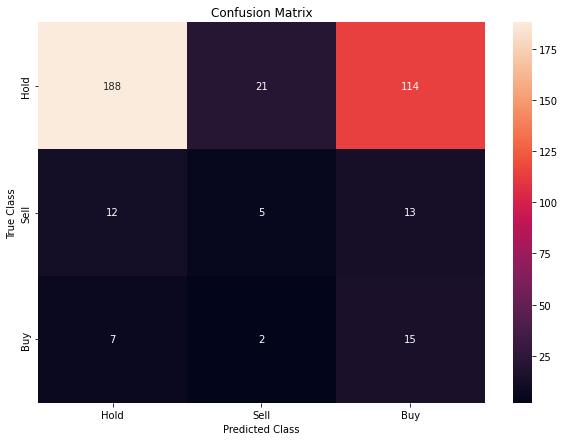

In [178]:
#The main diagonal shows the correct classifications for each class (True Positives)
#Other numbers that are positioned beyond the main diagonal indicate incorrect classifications.
#(0) hold
#(1) sell
#(2) buy
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# New class names
new_class_names = ['Hold', 'Sell', 'Buy']

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=new_class_names, yticklabels=new_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

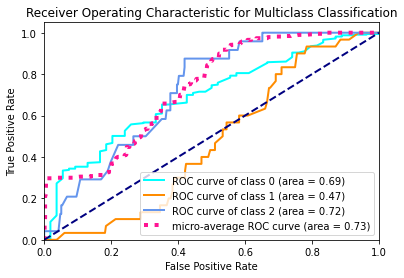

In [177]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_score = adaboost.predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

#### ensemble learning

In [179]:
# Define individual models
models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(booster='dart',objective="binary:logistic")),
    ('svc', SVC(probability=True))

]

# Define the ensemble model
ensemble = VotingClassifier(estimators=models, voting='soft')

# Fit the ensemble model to the training set
ensemble.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = ensemble.predict(X_test_pca)

In [153]:
# Calculate metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# For a detailed report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))


Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.88      0.76      0.81       323
     Class 1       0.06      0.07      0.06        30
     Class 2       0.16      0.42      0.23        24

    accuracy                           0.68       377
   macro avg       0.36      0.41      0.37       377
weighted avg       0.76      0.68      0.72       377



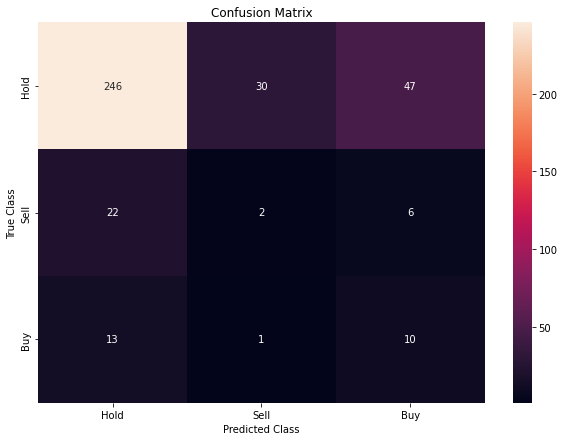

In [154]:
#The main diagonal shows the correct classifications for each class (True Positives)
#Other numbers that are positioned beyond the main diagonal indicate incorrect classifications.
#(0) hold
#(1) sell
#(2) buy
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# New class names
new_class_names = ['Hold', 'Sell', 'Buy']

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=new_class_names, yticklabels=new_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

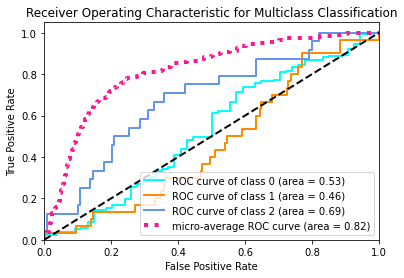

In [155]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Initialize the OneVsRestClassifier
classifier = OneVsRestClassifier(VotingClassifier(estimators=models, voting='soft'))
y_score = classifier.fit(X_train_smote, y_train_smote).predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label="ROC curve of class {0} (area = {1:0.2f})"
                   "".format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color="deeppink", linestyle=":", linewidth=4,
         label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

# Validation

# K fold Approach

In [ ]:
# by checking all model's performances in terms of F1 score, recognizing minority and majority class and overall performance,
# XGB performed well
# but how consistant the perfromance is?
# to make model reliable and avoid overfitting, reduce bias and efficient use of all data during folds, k fold approach is used 


In [156]:
model = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    seed=42,
    num_class=n_classes
)

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

validation_scores = []

fold_num = 0
for train_index, val_index in kf.split(X_train_smote):
    fold_num += 1
    X_train_fold, X_val_fold = X_train_smote[train_index], X_train_smote[val_index]
    y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[val_index]

    model.fit(X_train_fold, y_train_fold)
    y_pred_val = model.predict(X_val_fold)
    fold_accuracy = accuracy_score(y_val_fold, y_pred_val)
    validation_scores.append(fold_accuracy)

    # Print accuracy and classification report for the current fold
    print(f"Fold {fold_num}: Validation Accuracy = {fold_accuracy:.4f}")
    print(f"Classification Report for Fold {fold_num}:")
    print(classification_report(y_val_fold, y_pred_val))

average_validation_score = np.mean(validation_scores)
print("Average Validation Score:", average_validation_score)

model.fit(X_train_smote, y_train_smote)
y_pred_test = model.predict(X_test_pca)
final_test_accuracy = accuracy_score(y_test, y_pred_test)
print("Final Test Accuracy:", final_test_accuracy)
print("Final Test Classification Report:")
print(classification_report(y_test, y_pred_test))


Fold 1: Validation Accuracy = 0.6642
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       141
           1       0.63      0.64      0.63       133
           2       0.65      0.79      0.71       131

    accuracy                           0.66       405
   macro avg       0.67      0.67      0.66       405
weighted avg       0.67      0.66      0.66       405

Fold 2: Validation Accuracy = 0.6519
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       145
           1       0.63      0.62      0.62       130
           2       0.62      0.77      0.68       130

    accuracy                           0.65       405
   macro avg       0.66      0.65      0.65       405
weighted avg       0.66      0.65      0.65       405

Fold 3: Validation Accuracy = 0.6535
Classification Report for Fold 3:
              precision  

# walk forword aproach

In [ ]:
# The Walk Forward Approach is a method used in time series forecasting and financial trading strategies to evaluate and validate models.
# The approach involves training a model on a certain period of historical data and then testing it on a subsequent period. 
# As new data becomes available, the model is updated and tested again in a rolling manner. 
# This method helps in understanding how well a model performs in live conditions.


In [180]:
# Define the model
model = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    seed=42,
    num_class=n_classes
)


# Setup TimeSeriesSplit with desired number of splits
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)

# Lists to store results of each fold
validation_scores = []

# Print indices and perform cross-validation
fold_num = 0
for train_index, test_index in tscv.split(X_train_smote):
    fold_num += 1

    # Split data using indices provided by TimeSeriesSplit
    X_train_fold, X_test_fold = X_train_smote[train_index], X_train_smote[test_index]
    y_train_fold, y_test_fold = y_train_smote[train_index], y_train_smote[test_index]

    # Train the model
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test set of this fold
    y_pred_test_fold = model.predict(X_test_fold)
    fold_accuracy = accuracy_score(y_test_fold, y_pred_test_fold)
    validation_scores.append(fold_accuracy)

    # Print indices, accuracy, and classification report for this fold
    print(f"Fold {fold_num}:")
  #  print("Training indices:", train_index)
  #  print("Testing indices:", test_index)
    print(f"Validation Accuracy = {fold_accuracy:.4f}")
    print(f"Classification Report for Fold {fold_num}:")
    print(classification_report(y_test_fold, y_pred_test_fold))

# Calculate average accuracy across all folds
average_validation_score = np.mean(validation_scores)
print("Average Validation Score:", average_validation_score)

# Final evaluation on the test set
model.fit(X_train_smote, y_train_smote)  # Train on the entire training set
y_pred_test = model.predict(X_test_pca)  # Predict on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)  # Calculate accuracy
print("Test Set Accuracy:", test_accuracy)
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

Fold 1:
Validation Accuracy = 0.6059
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       282
           1       0.96      0.14      0.24       174
           2       0.00      0.00      0.00        49

    accuracy                           0.61       505
   macro avg       0.52      0.38      0.33       505
weighted avg       0.66      0.61      0.50       505

Fold 2:
Validation Accuracy = 0.3188
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.95      0.35      0.51       436
           2       0.53      0.12      0.19        69

    accuracy                           0.32       505
   macro avg       0.49      0.16      0.23       505
weighted avg       0.89      0.32      0.47       505

Fold 3:
Validation Accuracy = 0.1762
Classification Report for Fold 3:
              precision  

C:\Users\DhruviJayPatel\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\DhruviJayPatel\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\DhruviJayPatel\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\DhruviJayPatel\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no

# Backtesting - Stock simulation




In [200]:
# Sort the DataFrame by the 'Date' column
df1 = df1.sort_values('Date')

# Determine the index to split at 70% of the dates
split_idx = int(len(df1) * 0.7)

# Split the data based on this index
train_df = df1.iloc[:split_idx].copy()
test_df = df1.iloc[split_idx:].copy()

# Extract X and y for both training and testing sets
X_train = train_df.drop(columns=['Target'])
y_train = train_df['Target']
X_test = test_df.drop(columns=['Target'])
y_test = test_df['Target']

In [201]:
# Initialize the XGBoost classifier
model_xgb = xgb.XGBClassifier(
    objective='multi:softprob',  # 'multi:softprob' for multi-class
    n_estimators=100,            # Number of trees to train
    learning_rate=0.1,           # Learning rate
    max_depth=3,                 # Depth of each tree
    seed=42                      # For reproducibility
)

# Train the model
model_xgb.fit(X_train_smote, y_train_smote)

# Predicting the test set results
y_pred = model_xgb.predict(X_test_pca)

In [202]:
# Add the predictions to the test DataFrame
test_df.loc[:, 'Predicted_Signal'] = y_pred

# Map the numerical signals to 'buy', 'sell', and 'hold'
signal_mapping = {0: 'hold', 1: 'sell', 2: 'buy'}
test_df.loc[:, 'Signal'] = test_df['Predicted_Signal'].map(signal_mapping)

In [203]:
def backtest_strategy(df, initial_investment=100,transaction_cost=0.01):

    # Initialize variables
    cash = initial_investment
    holdings = 0
    portfolio_value = initial_investment
    df['Portfolio_Value'] = 0
    df['Action'] = ''
    df['Profitability'] = 0
    df['Holdings'] = 0
    df['Cash'] = 0

    for i in range(len(df)):
        signal = df.iloc[i]['Signal']
        price = df.iloc[i]['Open']  # Use the opening price for transactions

        if signal == 'buy' and cash > 0:
            # Calculate the transaction cost
            cost = cash * transaction_cost
            # Buy as much as possible with the available cash minus transaction cost
            holdings += (cash - cost) / price
            cash = 0
            df.iloc[i, df.columns.get_loc('Action')] = 'buy'
        elif signal == 'sell' and holdings > 0:
            # Calculate the transaction cost
            cost = holdings * price * transaction_cost
            # Sell all holdings minus transaction cost
            cash += holdings * price - cost
            holdings = 0
            df.iloc[i, df.columns.get_loc('Action')] = 'sell'
        else:
            df.iloc[i, df.columns.get_loc('Action')] = 'hold'

        # Calculate the current portfolio value
        portfolio_value = cash + holdings * price
        df.iloc[i, df.columns.get_loc('Portfolio_Value')] = portfolio_value

        # Calculate profitability
        profitability = (portfolio_value - initial_investment) / initial_investment * 100
        df.iloc[i, df.columns.get_loc('Profitability')] = profitability

        # Update holdings and cash in the DataFrame
        df.iloc[i, df.columns.get_loc('Holdings')] = holdings
        df.iloc[i, df.columns.get_loc('Cash')] = cash

    return df

In [205]:
# Convert 'Date' column to datetime if it isn't already
if not pd.api.types.is_datetime64_any_dtype(backtest_results['Date']):
    backtest_results['Date'] = pd.to_datetime(backtest_results['Date'])


In [206]:
# Drop rows with NaN values in relevant columns
backtest_results = backtest_results.dropna(subset=['Date', 'Portfolio_Value', 'Profitability', 'Holdings', 'Cash'])


In [207]:
##### run this command and upgrade the library if ended up having warnings and errors!!!
pip install --upgrade matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DhruviJayPatel\\AppData\\Roaming\\Python\\Python39\\site-packages\\~-mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Check the permissions.



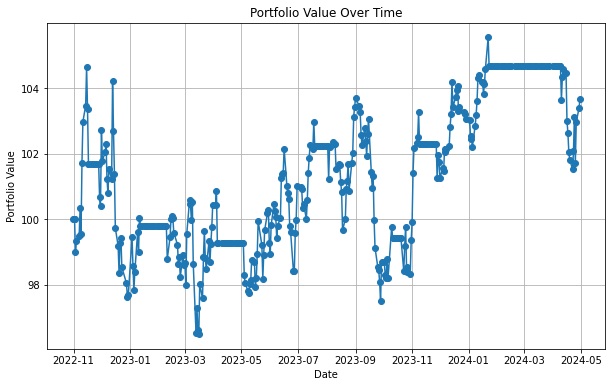

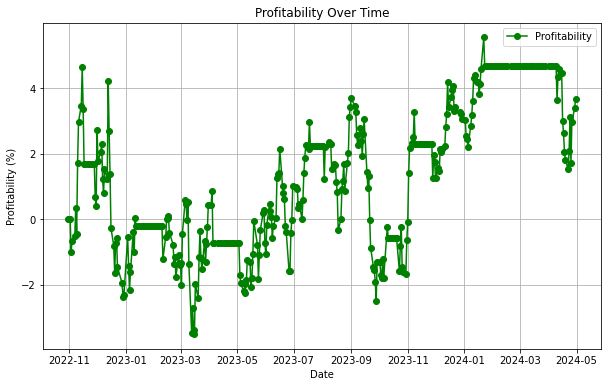

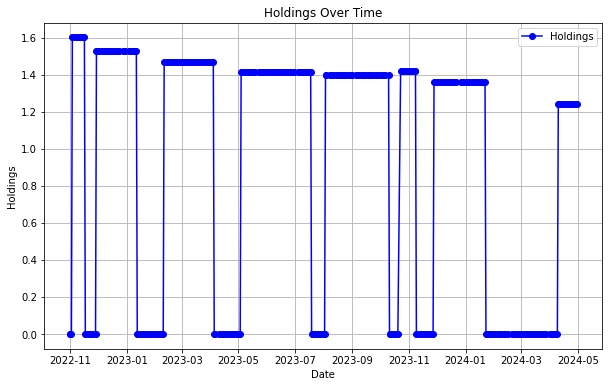

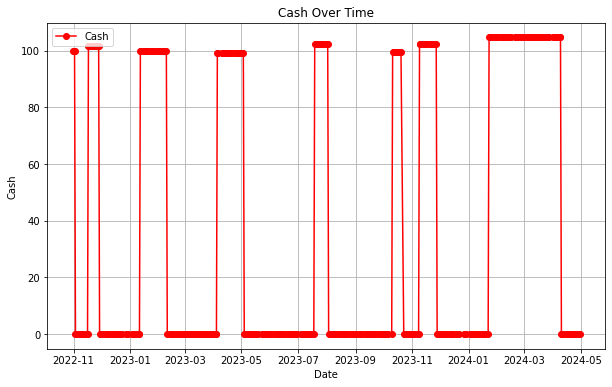

In [209]:
import matplotlib.pyplot as plt

# Convert columns to Numpy arrays
dates = backtest_results['Date'].to_numpy()
portfolio_values = backtest_results['Portfolio_Value'].to_numpy()
profitability = backtest_results['Profitability'].to_numpy()
holdings = backtest_results['Holdings'].to_numpy()
cash = backtest_results['Cash'].to_numpy()

# Plot Portfolio Value Over Time
plt.figure(figsize=(10, 6))
plt.plot(dates, portfolio_values, marker='o')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.grid(True)
plt.show()

# Plot Profitability Over Time
plt.figure(figsize=(10, 6))
plt.plot(dates, profitability, marker='o', color='green', label='Profitability')
plt.xlabel('Date')
plt.ylabel('Profitability (%)')
plt.title('Profitability Over Time')
plt.grid(True)
plt.legend()
plt.show()

# Plot Holdings Over Time
plt.figure(figsize=(10, 6))
plt.plot(dates, holdings, marker='o', color='blue', label='Holdings')
plt.xlabel('Date')
plt.ylabel('Holdings')
plt.title('Holdings Over Time')
plt.grid(True)
plt.legend()
plt.show()

# Plot Cash Over Time
plt.figure(figsize=(10, 6))
plt.plot(dates, cash, marker='o', color='red', label='Cash')
plt.xlabel('Date')
plt.ylabel('Cash')
plt.title('Cash Over Time')
plt.grid(True)
plt.legend()
plt.show()


In [210]:
backtest_results.to_excel('output_bactest.xlsx', index=False)